# Photovoltaics

As Moosh allows to compute quickly the absorption in each layer using the ```absorption``` function, it is possible to compute the current this would generate if we assume every charge carrier generated by every photon absorbed in the structure is finally captured and contributes to the current. This is here the short-circuit current which is computed, in these conditions. The conversion efficiency is the ratio of the short-circuit current to the the theoretical current generated by a perfectly absorbing material.



## Simple silicon layer

Here, we define the structure by artificially dividing the Silicon layer (acutally hydrogenated amorphous silicon) in two. This is not required, it is only to demonstrate that several absorbing layers can be handled at the same time. 

In [2]:
from PyMoosh import *
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150


photovoltaic = Structure([1.,"SiA"],[0,1,1,0],[0,500,500,0])


List of materials:
Simple, non dispersive: epsilon= 1.0
Database material: SiA


Now we call the ```Photo``` function. There are two active layers (1 and 2 since we artificially divided the active layer in two), which is simply specified by using a list of their numbers (```[1,2]```). 

In [3]:
efficiency,current,current_max,wl,spectrum,absorb1 = Photo(photovoltaic,0.,0.,375.,750.,[1,2],1000)

print("\n Conversion efficiency",efficiency,"\n Short-circuit current \n   ",current,"mA/cm^2 \n Theoretical max. current for this wavelength range\n   ",current_max,"mA/cm^2")



 Conversion efficiency 0.5956921306785686 
 Short-circuit current 
    13.744655994288012 mA/cm^2 
 Theoretical max. current for this wavelength range
    23.073422136080783 mA/cm^2


Now, we have a look at the density of photons in the solar spectrum and at the absorbance in the right layers. We plot the density of photons per wavelength unit (based on an AM 1.5) and the absorbance, which shows it is larger where the density of photons is essentially at its highest. It is common to plot the solar spectrum, but the spectral density of photons is actually much more interesting.

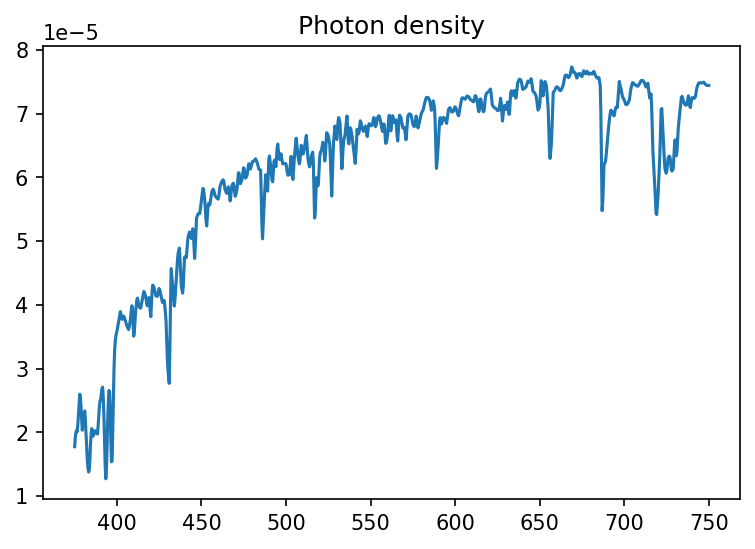

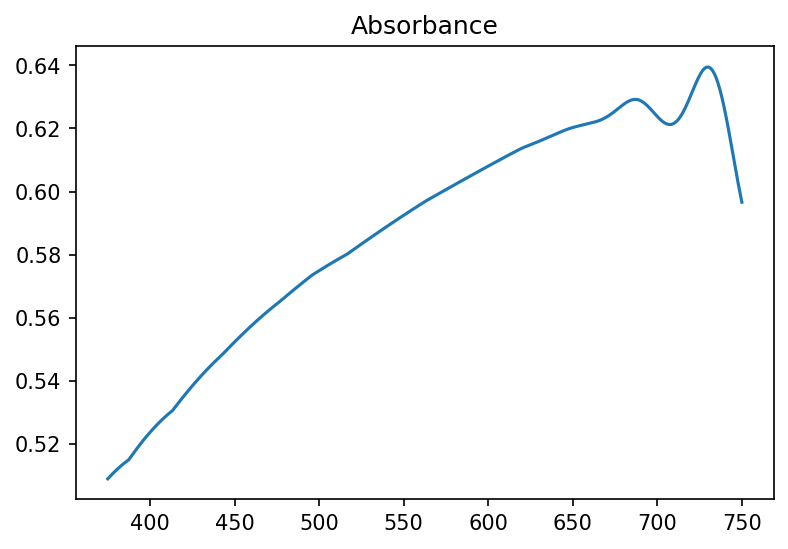

In [4]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Photon density')
plt.plot(wl,spectrum)
plt.figure(2)
plt.title('Absorbance')
plt.plot(wl,absorb1)
plt.show()


## Anti-reflective coatings

We add here an anti-reflective coating with a refractive index of 1.5. If we want the largest effect to occur around 600 nm, we take a thickness of $\frac{\lambda}{4 n}$, and so 100 nm. 


In [5]:
simple_ar = Structure([1.,2.25,"SiA"],[0,1,2,0],[0,100,1000,0])


List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.25
Database material: SiA



 Conversion efficiency 0.8393759125911705 
 Short-circuit current 
    19.36727476207412 mA/cm^2 
 Theoretical max. current for this wavelength range
    23.073422136080783 mA/cm^2


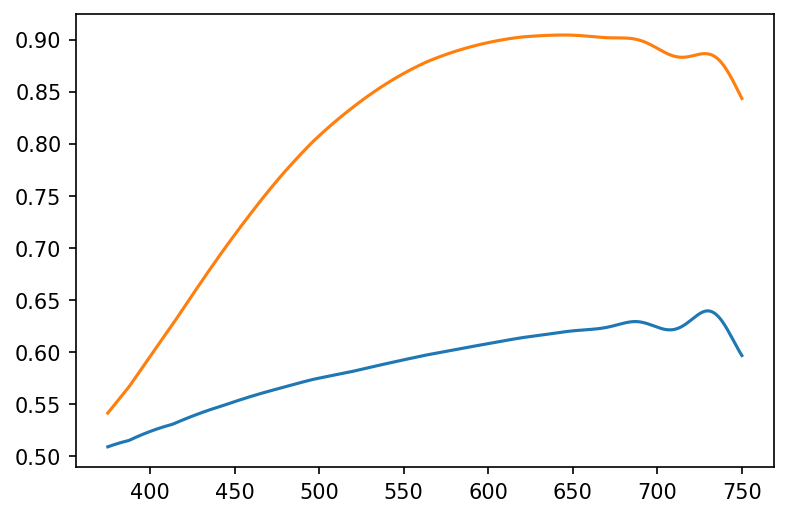

In [6]:
efficiency,current,current_max,wl,spectrum,absorb2 = Photo(simple_ar,0.,0.,375.,750.,[1,2],1000)

print("\n Conversion efficiency",efficiency,"\n Short-circuit current \n   ",current,"mA/cm^2 \n Theoretical max. current for this wavelength range\n   ",current_max,"mA/cm^2")

plt.figure(3)
plt.plot(wl,absorb1)
plt.plot(wl,absorb2)

## Back reflector

It is relatively easy to add a silver back reflector. For such a relatively large thickness, it does not change much. This is because the Si layer is relatively absorbing for short wavelength. In the red part of the spectrum, oscillations corresponding to resonances of the layer can be seen.

In [7]:
realistic = Structure([1.,2.25,"SiA","Silver"],[0,1,2,3],[0,100,1000,0])

List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.25
Database material: SiA
Database material: Silver



 Conversion efficiency 0.8409188559836906 
 Short-circuit current 
    19.402875746301817 mA/cm^2 
 Theoretical max. current for this wavelength range
    23.073422136080783 mA/cm^2


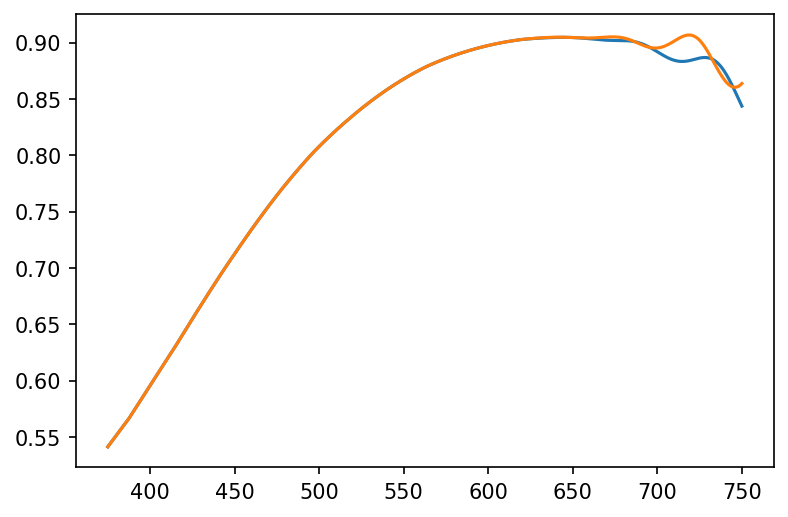

In [8]:
efficiency,current,current_max,wl,spectrum,absorb3 = Photo(realistic,0.,0.,375.,750.,[1,2],1000)

print("\n Conversion efficiency",efficiency,"\n Short-circuit current \n   ",current,"mA/cm^2 \n Theoretical max. current for this wavelength range\n   ",current_max,"mA/cm^2")

plt.figure(3)
plt.plot(wl,absorb2)
plt.plot(wl,absorb3)

## Advanced anti-reflective coating

We have used an evolutionary algorithm (Differential Evolution) able to retrieve [naturally occurring photonic structures](https://www.nature.com/articles/s41598-020-68719-3) (and to compare evolution and evolutionary algorithms for the first time ever) to generate a particularly efficient (but complex) [anti-reflective coating](https://www.dropbox.com/s/lxngh88svjdvj08/PhysRevB.103.125135.pdf?dl=0). See how, it really improves things on the 375-750 nm range, especially for the part of the spectrum where the photon density is at its highest. Something we had not asked but that the AR does, is to reflect the IR part of the spectrum very efficiently - so that you can choose what to absorb and what not to absorb (heating is detrimental to the performances of any photovoltaic device). 

[0, 79, 102, 147, 120, 147, 120, 147, 120, 100, 70, 3000]
[1.0, 2.0, 3.0, 'SiA']
[0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3]
List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.0
Simple, non dispersive: epsilon= 3.0
Database material: SiA
11

 Conversion efficiency 0.8876864473038844 
 Short-circuit current 
    20.481964123120353 mA/cm^2 
 Theoretical max. current for this wavelength range
    23.073422136080783 mA/cm^2


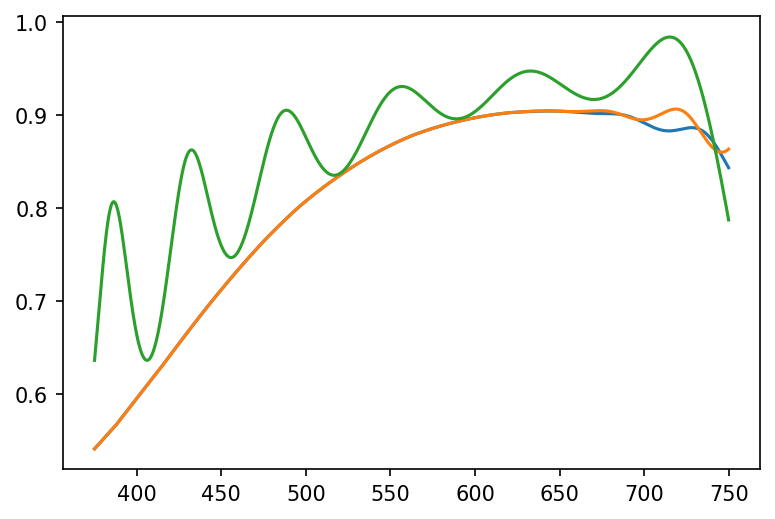

In [9]:
adapt_imp_air = [79,102]
adapt_imp_si = [100,70]
dbr = [147, 120]*3
hauteur = [0] + adapt_imp_air + dbr + adapt_imp_si + [3000]
print(hauteur)

Epsilon = [1.,2.,3., "SiA"]
print(Epsilon)

Type = [0] + [1,2]*5 + [3]
print(Type)

advanced_AR = Structure(Epsilon, Type, hauteur)
active_layer = len(hauteur) -1
print(active_layer)

efficiency,current,current_max,wl,spectrum,absorb4 = Photo(advanced_AR,0.,0.,375.,750.,[active_layer],1000)

print("\n Conversion efficiency",efficiency,"\n Short-circuit current \n   ",current,"mA/cm^2 \n Theoretical max. current for this wavelength range\n   ",current_max,"mA/cm^2")

plt.figure(3)
plt.plot(wl,absorb2)
plt.plot(wl,absorb3)
plt.plot(wl, absorb4)
